In [198]:
import pandas as pd
import numpy as np

In [199]:
df=pd.read_csv("BTC-USD(1).csv")
df1=pd.read_csv("MICH.csv")

In [200]:
df=df.drop(columns=["Date","High","Low","Close","Adj Close","Volume"])

In [201]:
df1 = df1.rename(columns={'DATE': 'Date', 'MICH': 'Rate'})

In [202]:
df=df.rename(columns={"Open":"Price"})

In [203]:
result = pd.concat([df1, df], axis=1)

In [204]:
result1=result.copy()

In [205]:

result1['Rate_1']= result1['Rate'] *10000


In [206]:
result.drop(columns=["Rate"])

,Date,Price
0,2018-01-01,14112.200195
1,2018-02-01,10237.299805
2,2018-03-01,10385.000000
3,2018-04-01,7003.060059
4,2018-05-01,9251.469727
...,...,...
56,2022-09-01,20050.498047
57,2022-10-01,19431.105469
58,2022-11-01,20494.898438
59,2022-12-01,17168.001953


<AxesSubplot:>

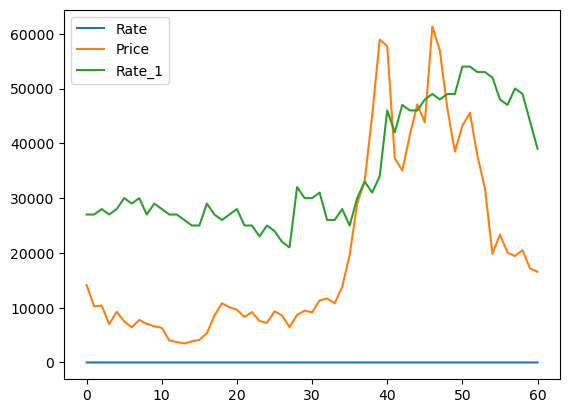

In [207]:
result1.plot()

In [208]:
result1

,Date,Rate,Price,Rate_1
0,2018-01-01,2.7,14112.200195,27000.0
1,2018-02-01,2.7,10237.299805,27000.0
2,2018-03-01,2.8,10385.000000,28000.0
3,2018-04-01,2.7,7003.060059,27000.0
4,2018-05-01,2.8,9251.469727,28000.0
...,...,...,...,...
56,2022-09-01,4.7,20050.498047,47000.0
57,2022-10-01,5.0,19431.105469,50000.0
58,2022-11-01,4.9,20494.898438,49000.0
59,2022-12-01,4.4,17168.001953,44000.0


In [209]:
X = result1["Price"]
y = result1.drop(columns=["Price","Rate","Date"],axis=1)


In [210]:
X=X.astype(int)
y=y.astype(int)

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split
import sklearn.metrics as mt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=1)
model=DecisionTreeClassifier(random_state=5,max_leaf_nodes=21)
model.fit(X_train.values.reshape(-1,1),y_train)
tahmin=model.predict(X_test.values.reshape(-1,1))
r2=mt.r2_score(y_test,tahmin)
mse=mt.mean_squared_error(y_test,tahmin)
print(r2,mse)


0.5842311416248571 51093023.255813956
